## Features

* https://paper.dropbox.com/doc/Features-uedG9wB1hIWGBYz63TBpi

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *

In [13]:
DATA_DIR = '../data/'
img_fpath = os.path.join(DATA_DIR, 'segmentation', 'bimodal.jpg')
FIGSIZE=(14,14)

In [14]:
def plot_img(arr, fs=FIGSIZE, cmap='gray', title=None):
    plt.figure(figsize=fs)
    plt.imshow(arr, cmap=cmap)
    plt.title(title)
    plt.show()

def load_cv2_img(fpath, w=None, h=None, colorspace=None):
    img = cv2.imread(fpath)
    if colorspace is not None:
        img = cv2.cvtColor(img, colorspace)
    if None not in [w,h]:
        img = cv2.resize(img, (w, h), interpolation=cv2.INTER_CUBIC)
    return img

## Edges

In [71]:
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_DILATE, (3,3))
erode_kernel = cv2.getStructuringElement(cv2.MORPH_ERODE, (3,3))

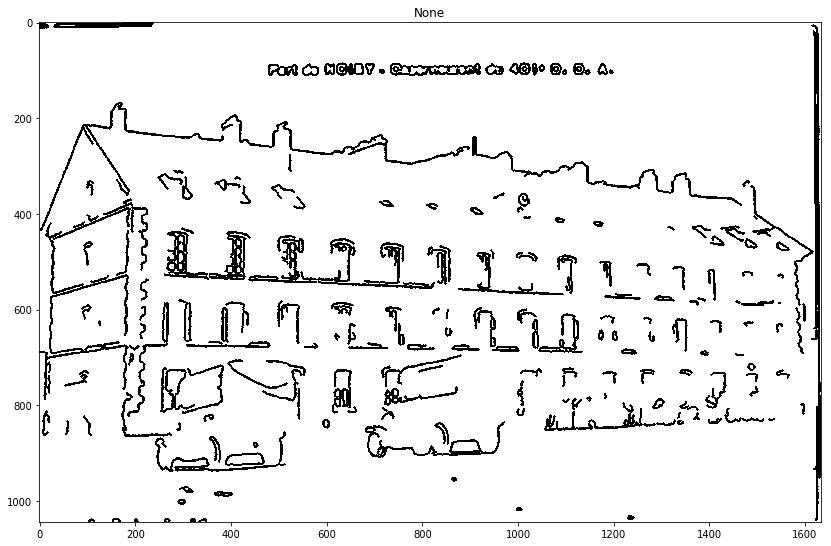

In [75]:
img = load_cv2_img(img_fpath, colorspace=cv2.COLOR_BGR2RGB)

# Opening
img = cv2.erode(img, erode_kernel, iterations = 2)
img = cv2.dilate(img, dilate_kernel, iterations = 2)

# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, ksize=(5,5), sigmaX=5)

lower_threshold = 125
upper_threshold = 225
edges = cv2.Canny(gray, lower_threshold, upper_threshold)

edges = cv2.dilate(edges, dilate_kernel, iterations = 2)
plot_img(cv2.bitwise_not(edges))

## Contours

* Contours "connect the dots" and group similar points into lines and curves
* Pass in corners or edges from Canny 
* https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html
* https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html

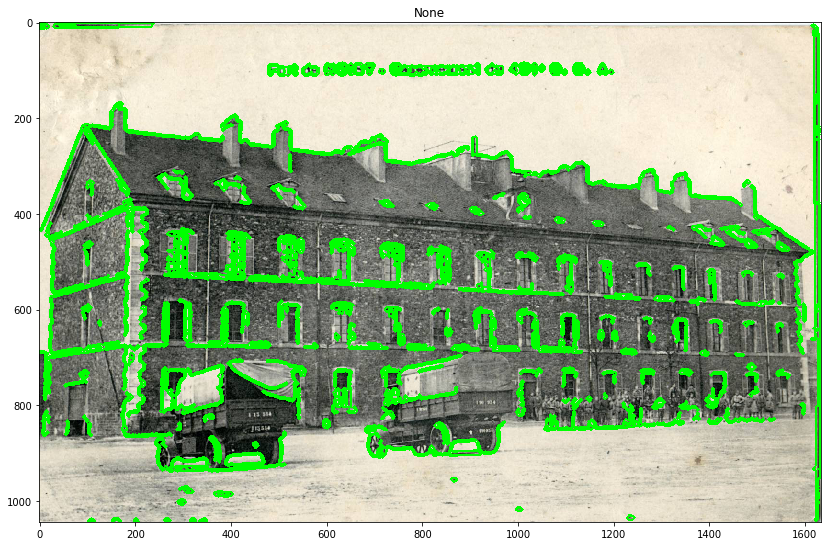

In [84]:
img = load_cv2_img(img_fpath, colorspace=cv2.COLOR_BGR2RGB)
im2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0), 3)
plot_img(img)

## Moments

* Image moments help you to calculate the center or area of a contour

In [85]:
cnt = contours[0]
M = cv2.moments(cnt)

# Centroid
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

## Harris Corners

* https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
* https://matlabcorner.wordpress.com/2012/11/17/does-harris-corner-detector-finds-corners-intuitive-explanation-to-harris-corner-detector/

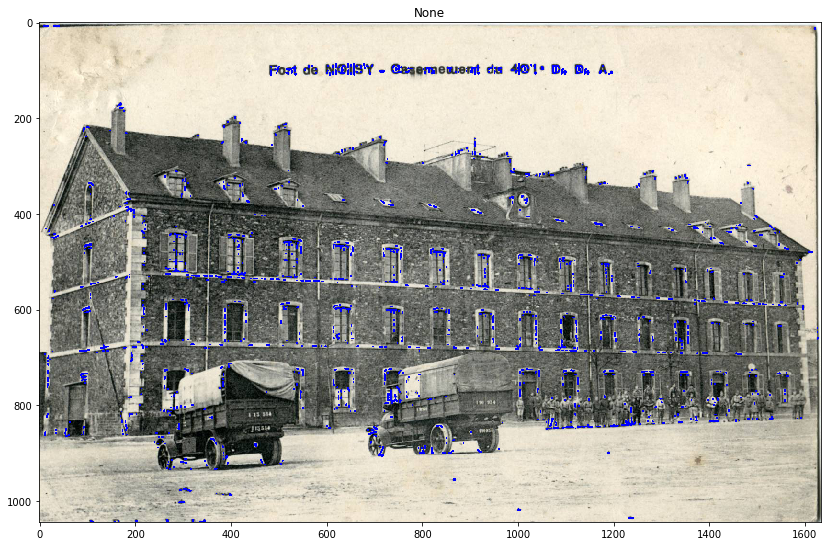

In [78]:
img = load_cv2_img(img_fpath, colorspace=cv2.COLOR_BGR2RGB)

# Opening
dst = cv2.erode(img.copy(), erode_kernel, iterations = 2)
dst = cv2.dilate(dst, dilate_kernel, iterations = 2)

# Grayscale
gray = cv2.cvtColor(dst, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, ksize=(7,7), sigmaX=5)

# Corners
dst = cv2.cornerHarris(gray, 2, 3, .04)

# Dilate result for plotting the corners (not important)
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

plot_img(img)

## Shi Tomasi Corners

* https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html

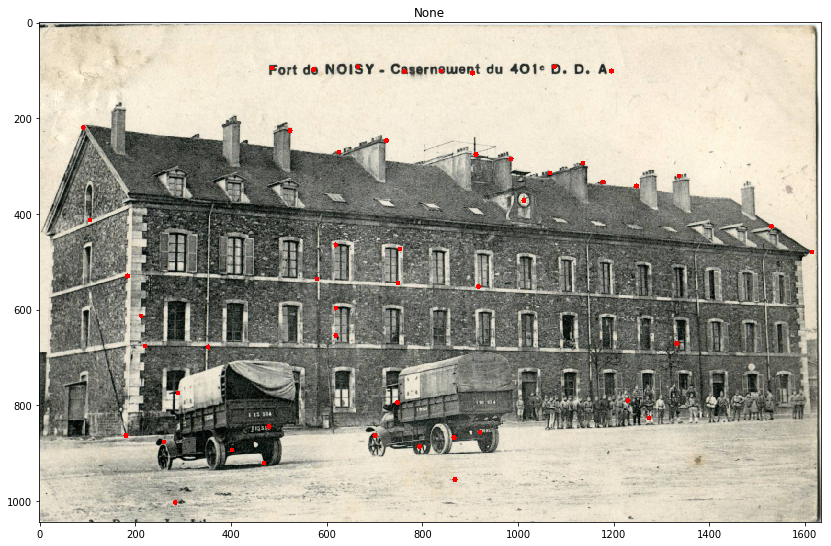

In [66]:
img = load_cv2_img(img_fpath, colorspace=cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# "goodFeaturesToTrack" implements Shi-Tomasi by default
corners = cv2.goodFeaturesToTrack(gray, maxCorners=50, qualityLevel=.01, minDistance=50)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img, (x,y), 5, 255, -1)

plot_img(img)

## SIFT

* Scale Invariant Feature Transform